In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set()
from IPython.display import display
import statsmodels.formula.api as smf
from collections import Counter

In [3]:
fuel = pd.DataFrame(pd.read_csv('/Users/Alphabum/Github/DSCI6002-student/week_8/vehicles.csv', low_memory=False))

In [5]:
fuel.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [165]:
fuel.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [166]:
# Initial EDA...Removing column names, based on whether they have all populated values.
# May decide later to swap, delete or add additional columns.

all_column_names = ['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn', 'startStop', 'phevCity', 'phevHwy',
       'phevComb']

most_populated = ['city08','co2TailpipeGpm','comb08','drive','fuelCost08','fuelType',
                'fuelType1', 'highway08', 'make', 'model', 'atvType',
                  'trany','UCity','UHighway','year','atvType']

#Original dataset had numerous columns, created two lists, one containing all, second
#containing only the values currently wanted.

x = all_column_names     #shortened list names
y = most_populated

x = set(x)   #made lists into sets to use difference function with
y = set(y)

z = list(x.difference(y))  # list of feature names that are not wanted.

x = all_column_names       #converted sets back into lists
y = most_populated

N = len(x)

index_list_not_want = [i for i in range(0,N) if x[i] in z]  #indices not wanted from original

naught = index_list_not_want  #shortened name for aesthetics

fuel.drop(fuel[naught], axis=1,inplace=True) #dropped indices not wanted, bam.

In [167]:
new_names = []
N = len(fuel.columns)

for col in fuel.columns:
    new_names.append(col.lower()\
                     .replace('co2tailpipegpm','co2_emissions')\
                     .replace('city08','city_mpg_adj')\
                     .replace('highway08','highway_mpg_adj')\
                     .replace('uhighway','highway_mpg')\
                     .replace('ucity','city_mpg')\
                     .replace('fuelcost08','fuel_cost')\
                     .replace('trany','transmission')\
                     .replace('comb08','combined_mpg_adj'))
    
fuel.columns = new_names  # assigned dummy_variable to dataframe

for i in fuel.columns:
    if type(fuel[i][0]) == str:  # replace function will create error if int or float is iterated
        fuel[i] = fuel[i].str.replace('-','_')  # .str here is used to look "at the string within the string"
        fuel[i] = fuel[i].str.replace(' ','_')
        fuel[i] = fuel[i].str.lower()

In [168]:
fuel.columns

Index(['city_mpg_adj', 'co2_emissions', 'combined_mpg_adj', 'drive',
       'fuel_cost', 'fueltype', 'fueltype1', 'highway_mpg_adj', 'make',
       'model', 'transmission', 'city_mpg', 'highway_mpg', 'year', 'atvtype'],
      dtype='object')

In [169]:
# Quickly identifying all unique observations for some features.

drive_choices = [sub_name for sub_name,subtype_df in fuel.groupby('drive')]
fueltype_choices = [sub_name for sub_name,subtype_df in fuel.groupby('fueltype')]
fueltype1_choices = [sub_name for sub_name,subtype_df in fuel.groupby('fueltype1')]
trany_choices = [sub_name for sub_name,subtype_df in fuel.groupby('transmission')]
atvtype_choices = [sub_name for sub_name,subtype_df in fuel.groupby('atvtype')]

In [170]:
drive_choices

['2_wheel_drive',
 '4_wheel_drive',
 '4_wheel_or_all_wheel_drive',
 'all_wheel_drive',
 'front_wheel_drive',
 'part_time_4_wheel_drive',
 'rear_wheel_drive']

In [171]:
# Changed the many iterations of all_wheel_drive into one observation. Simpler to work with.
# .str here is used to look "at the string within the string"

for i in fuel.columns: 
    if type(fuel[i][0]) == str:                  
        fuel[i] = fuel[i].str.replace('4_wheel_drive','all_wheel_drive')  
        fuel[i] = fuel[i].str.replace('4_wheel_or_all_wheel_drive','all_wheel_drive')
        fuel[i] = fuel[i].str.replace('part_time_all_wheel_drive','all_wheel_drive')

In [172]:
fuel['drive'].value_counts()

front_wheel_drive    13353
rear_wheel_drive     13020
all_wheel_drive      10051
2_wheel_drive          507
Name: drive, dtype: int64

In [173]:
atvtype_choices

['Bifuel (CNG)',
 'Bifuel (LPG)',
 'CNG',
 'Diesel',
 'EV',
 'FFV',
 'Hybrid',
 'Plug-in Hybrid']

In [174]:
for i in fuel.columns: 
    #lowercase functions would not work here, went in manually for last two types of observations.
        fuel[i] = fuel[i].replace('Plug-in Hybrid','hybrid')
        fuel[i] = fuel[i].replace('CNG','natural_gas')
        fuel[i] = fuel[i].replace('EV','electric')
        fuel[i] = fuel[i].replace('FFV','gasoline')
        fuel[i] = fuel[i].replace('Bifuel (CNG)','natural_gas')
        fuel[i] = fuel[i].replace('Bifuel (LPG)','liquid_propane')
        fuel[i] = fuel[i].replace('Hybrid','hybrid')
        fuel[i] = fuel[i].replace('Diesel','diesel')

In [175]:
fuel['atvtype'].value_counts()

gasoline          1345
diesel             942
hybrid             549
electric           134
natural_gas         70
liquid_propane       8
Name: atvtype, dtype: int64

In [176]:
# A lot of data is missing.. where are the nan's?

In [177]:
# Trick to finding hidden nan's in feature.
counts = Counter(fuel['atvtype'])
counts.keys()

dict_keys([nan, 'diesel', 'hybrid', 'natural_gas', 'gasoline', 'electric', 'liquid_propane'])

In [178]:
# Questioned why they weren't showing up. Finding type, showing nan's as floats..

print (fuel['atvtype'][0])
type(fuel['atvtype'][0])

nan


float

In [179]:
# All observations encoded as strings via apply method. Applying str individually would not work. (i.e. forloop)
# Any other methods would corrupt observations and add random alphanumerical characters.

fuel['atvtype'] = fuel['atvtype'].apply(str);

In [180]:
fuel['atvtype'].value_counts()

nan               35072
gasoline           1345
diesel              942
hybrid              549
electric            134
natural_gas          70
liquid_propane        8
Name: atvtype, dtype: int64

In [181]:
# No more nan-floats. Now strings.

print (fuel['atvtype'][0])
type(fuel['atvtype'][0])

# But still 35,000 nan's... so useless.

nan


str

In [202]:
for i in fuel.columns: 
    if type(fuel[i][0]) == str:
        fuel[i] = fuel[i].str.replace(r'auto.+','automatic')
        fuel[i] = fuel[i].str.replace(r'manual.+','manual')

In [182]:
#byfour = pd.DataFrame(fuel_eda.groupby([(fuel_eda.year//5)*5, fuel_eda.make]).combined_mpg.mean())

In [183]:
fuel.head()

,city_mpg_adj,co2_emissions,combined_mpg_adj,drive,fuel_cost,fueltype,fueltype1,highway_mpg_adj,make,model,transmission,city_mpg,highway_mpg,year,atvtype
0,19,423.190476,21,rear_wheel_drive,1650,regular,regular_gasoline,25,alfa_romeo,spider_veloce_2000,manual_5_spd,23.3333,35.0000,1985,nan
1,9,807.909091,11,rear_wheel_drive,3200,regular,regular_gasoline,14,ferrari,testarossa,manual_5_spd,11.0000,19.0000,1985,nan
2,23,329.148148,27,front_wheel_drive,1300,regular,regular_gasoline,33,dodge,charger,manual_5_spd,29.0000,47.0000,1985,nan
3,10,807.909091,11,rear_wheel_drive,3200,regular,regular_gasoline,12,dodge,b150/b250_wagon_2wd,automatic_3_spd,12.2222,16.6667,1985,nan
4,17,467.736842,19,all_wheel_drive,2250,premium,premium_gasoline,23,subaru,legacy_awd_turbo,manual_5_spd,21.0000,32.0000,1993,nan


In [184]:
fuel['combined_mpg'] = (fuel['city_mpg'] + fuel['city_mpg'])/2

In [185]:
fuel

,city_mpg_adj,co2_emissions,combined_mpg_adj,drive,fuel_cost,fueltype,fueltype1,highway_mpg_adj,make,model,transmission,city_mpg,highway_mpg,year,atvtype,combined_mpg
0,19,423.190476,21,rear_wheel_drive,1650,regular,regular_gasoline,25,alfa_romeo,spider_veloce_2000,manual_5_spd,23.3333,35.0000,1985,nan,23.3333
1,9,807.909091,11,rear_wheel_drive,3200,regular,regular_gasoline,14,ferrari,testarossa,manual_5_spd,11.0000,19.0000,1985,nan,11.0000
2,23,329.148148,27,front_wheel_drive,1300,regular,regular_gasoline,33,dodge,charger,manual_5_spd,29.0000,47.0000,1985,nan,29.0000
3,10,807.909091,11,rear_wheel_drive,3200,regular,regular_gasoline,12,dodge,b150/b250_wagon_2wd,automatic_3_spd,12.2222,16.6667,1985,nan,12.2222
4,17,467.736842,19,all_wheel_drive,2250,premium,premium_gasoline,23,subaru,legacy_awd_turbo,manual_5_spd,21.0000,32.0000,1993,nan,21.0000
5,21,403.954545,22,front_wheel_drive,1600,regular,regular_gasoline,24,subaru,loyale,automatic_3_spd,27.0000,33.0000,1993,nan,27.0000
6,22,355.480000,25,front_wheel_drive,1400,regular,regular_gasoline,29,subaru,loyale,manual_5_spd,28.0000,41.0000,1993,nan,28.0000
7,23,370.291667,24,front_wheel_drive,1450,regular,regular_gasoline,26,toyota,corolla,automatic_3_spd,29.0000,37.0000,1993,nan,29.0000
8,23,341.807692,26,front_wheel_drive,1350,regular,regular_gasoline,31,toyota,corolla,manual_5_spd,30.0000,43.0000,1993,nan,30.0000
9,23,355.480000,25,front_wheel_drive,1400,regular,regular_gasoline,30,toyota,corolla,automatic_4_spd,29.0000,42.0000,1993,nan,29.0000


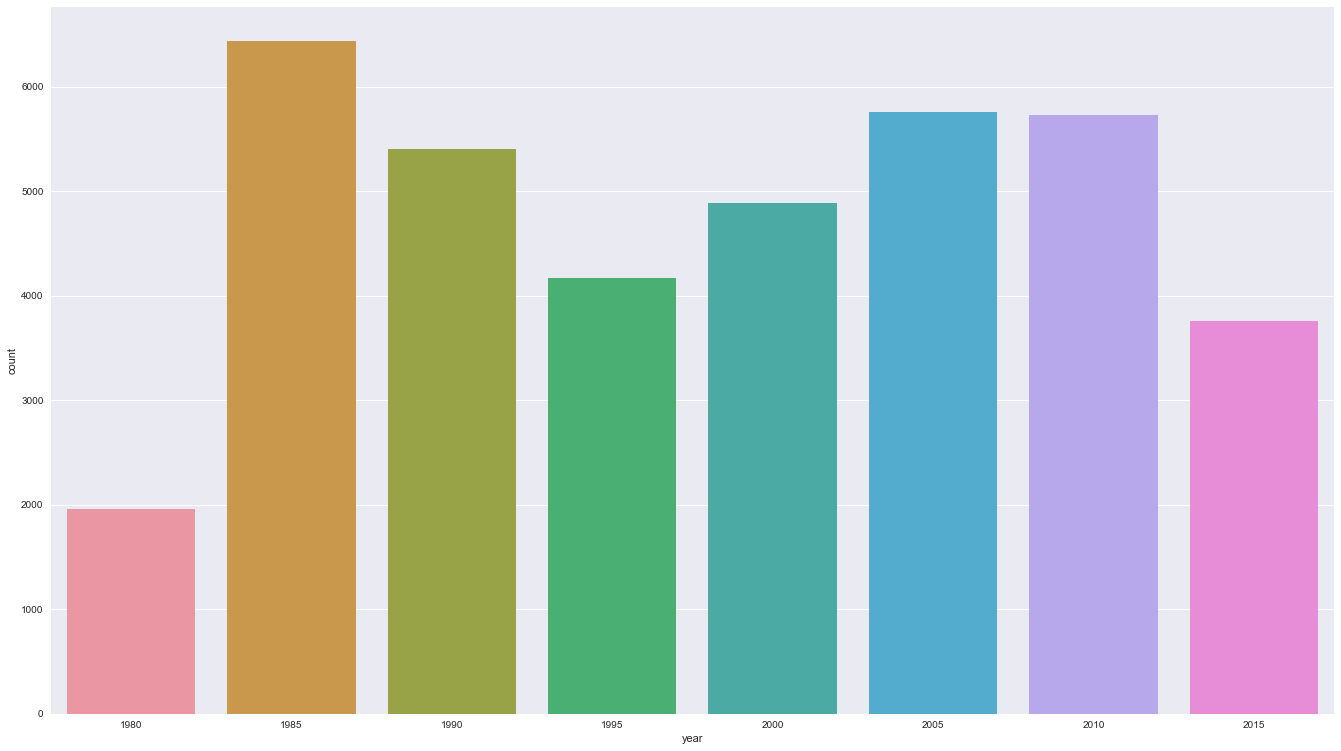

In [186]:
# The collective observations per year. This can be looked at as the amount of automobiles
# that are in the dataset per year.

df_year = pd.DataFrame((fuel.year//5)*5)
fig, ax = plt.subplots(figsize=(23,13))  
ax = sns.countplot(x="year", data=df_year) 

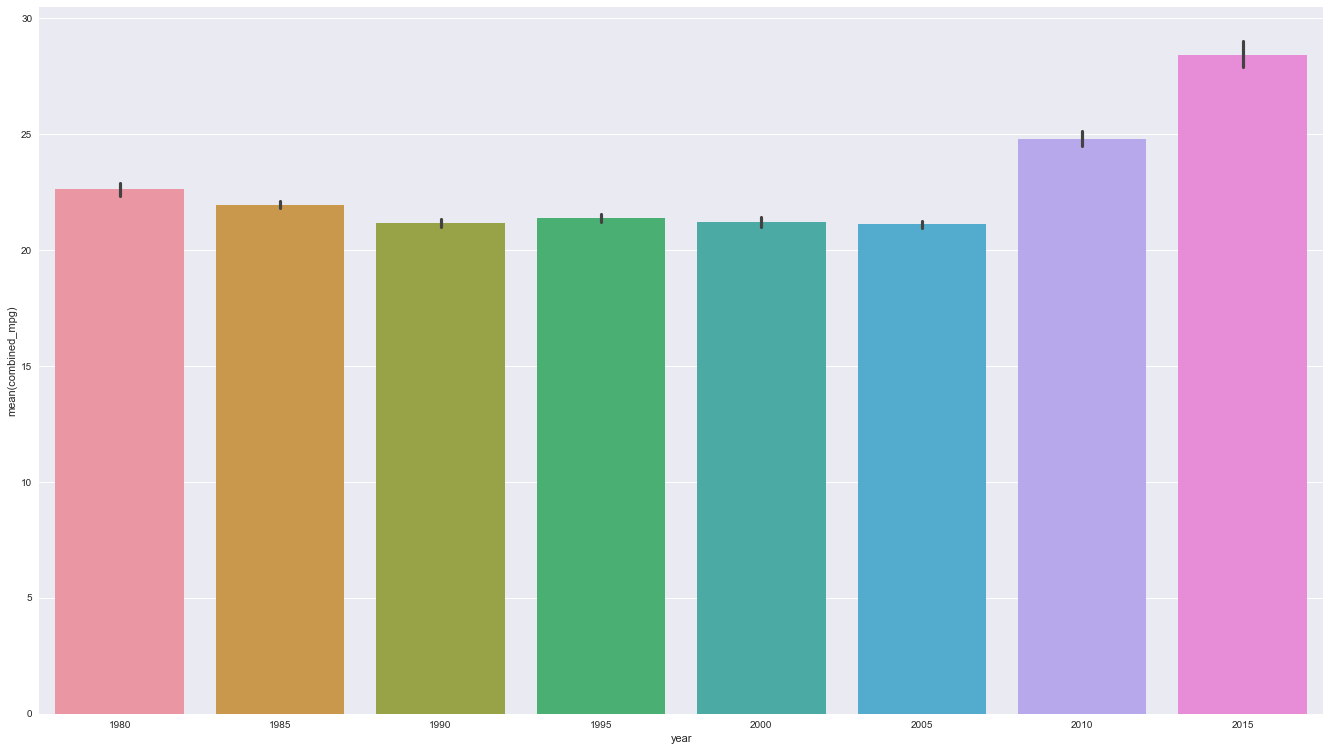

In [187]:
# This graph gives us a look at the mean fuel efficiency for a range spanning the dataset.
# The years have been grouped together to make dataset smaller and easier to read.

df_year = pd.DataFrame((fuel.year//5)*5)
df_mpg = pd.DataFrame(fuel.combined_mpg)

fig, ax = plt.subplots(figsize=(23,13))  
ax = sns.barplot(x=df_year.year, y=df_mpg.combined_mpg, ax=ax) 

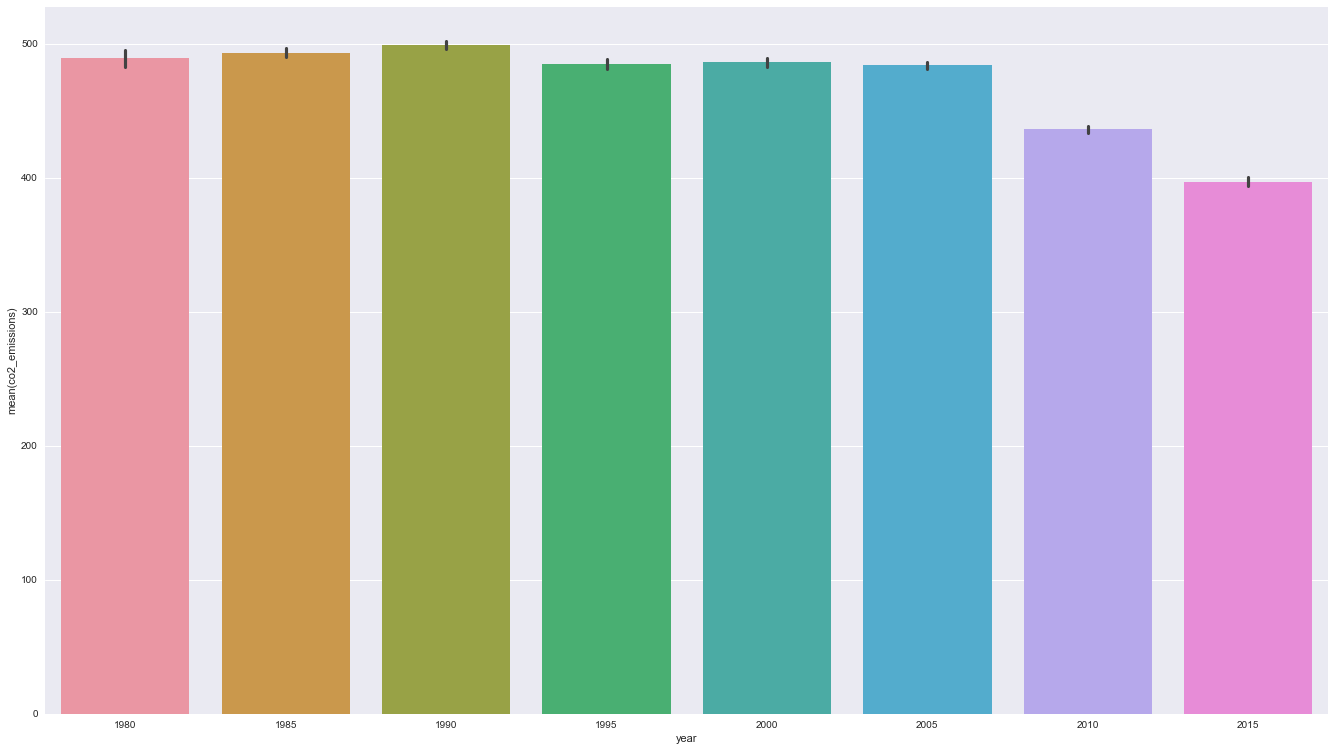

In [188]:
# This graph shows us a picture of the trend in mean CO2 emissions over the past 30 years.
# Was anyone else expecting a bigger change?

df_year = pd.DataFrame((fuel.year//5)*5)
df_co2 = pd.DataFrame(fuel.co2_emissions)

fig, ax = plt.subplots(figsize=(23,13))  
ax = sns.barplot(x=df_year.year, y=df_co2.co2_emissions, ax=ax) 

In [189]:
# Now that most of the cleanup and EDA has been done, time to save the file somewhere else.
# When the kernel breaks, easy to restart.

In [221]:
fuel = pd.DataFrame(pd.read_csv('/Users/Alphabum/Github/DSCI6002-student/week_8/cleaned_fuel_dataset.csv', low_memory=False))

In [222]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
sns.set()
from IPython.display import display
import statsmodels.formula.api as smf
from collections import Counter
from scipy.stats import binom
import scipy.stats as stats

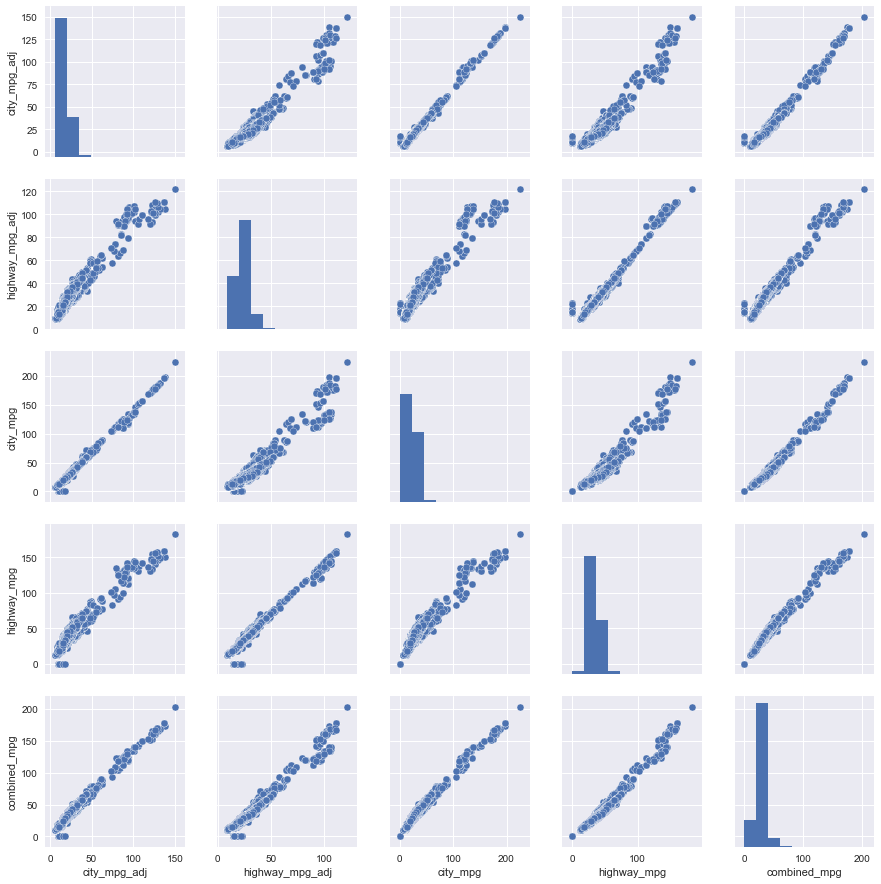

In [223]:
# Based on how some features are calculated, it is easy to see which of them will be dependent. 

X3 = fuel[['city_mpg_adj', 'highway_mpg_adj', 'city_mpg', 'highway_mpg','combined_mpg']]

sns.pairplot(X3);

In [224]:
fuel.columns

Index(['Unnamed: 0', 'city_mpg_adj', 'co2_emissions', 'combined_mpg_adj',
       'drive', 'fuel_cost', 'fueltype', 'fueltype1', 'highway_mpg_adj',
       'make', 'model', 'transmission', 'city_mpg', 'highway_mpg', 'year',
       'atvtype', 'combined_mpg'],
      dtype='object')

In [225]:
#This is already the best model.

model = 'combined_mpg ~ drive + fueltype1 + fueltype + transmission + year'
smf.ols(formula=model, data=fuel).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           combined_mpg   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     4151.
Date:                Thu, 09 Mar 2017   Prob (F-statistic):               0.00
Time:                        08:50:37   Log-Likelihood:            -1.1598e+05
No. Observations:               36923   AIC:                         2.320e+05
Df Residuals:                   36904   BIC:                         2.322e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Intercept                                -375.5472      5.374    -69.881      0.000      -386.081  -365.014
drive[T.all_wheel_drive]                   -0.4525      0.263     -1.719      0.086        -0.968     0.063
drive[T.front_wheel_drive]                  8.8712      0.261     34.052      0.000         8.361     9.382
drive[T.rear_wheel_drive]                   0.0788      0.260      0.303      0.762        -0.431     0.589
fueltype1[T.electricity]                    5.0598      0.641      7.890      0.000         3.803     6.317
fueltype1[T.midgrade_gasoline]            -47.8266      0.665    -71.951      0.000       -49.129   -46.524
fueltype1[T.natural_gas]                  -97.5241      1.300    -75.021      0.000      -100.072   -94.976
fueltype1[T.premium_gasoline]             -70.0197      1.000    -70.026      0.000       -71.980   -68.060
fueltype1[T.regular_gasoline]             -79.1005      1.157    -68.362      0.000       -81.368   -76.833
fueltype[T.diesel]                        -86.1360      1.145    -75.223      0.000       -88.380   -83.892
fueltype[T.electricity]                     5.0598      0.641      7.890      0.000         3.803     6.317
fueltype[T.gasoline_or_e85]               -17.8209      0.733    -24.313      0.000       -19.258   -16.384
fueltype[T.gasoline_or_natural_gas]       -26.7817      1.273    -21.041      0.000       -29.276   -24.287
fueltype[T.gasoline_or_propane]           -38.1698      1.811    -21.073      0.000       -41.720   -34.620
fueltype[T.midgrade]                      -47.8266      0.665    -71.951      0.000       -49.129   -46.524
fueltype[T.premium]                       -23.8418      0.436    -54.683      0.000       -24.696   -22.987
fueltype[T.premium_and_electricity]       -13.9967      0.967    -14.469      0.000       -15.893   -12.101
fueltype[T.premium_gas_or_electricity]    -10.5600      1.104     -9.563      0.000       -12.724    -8.396
fueltype[T.premium_or_e85]                -21.6212      0.589    -36.708      0.000       -22.776   -20.467
fueltype[T.regular]                       -14.0858      0.713    -19.746      0.000       -15.484   -12.688
fueltype[T.regular_gas_and_electricity]     8.5323      1.278      6.678      0.000         6.028    11.037
fueltype[T.regular_gas_or_electricity]      9.2254      3.407      2.708      0.007         2.548    15.902
transmission[T.manual]                      2.8957      0.064     44.985      0.000         2.770     3.022
year                                        0.2462      0.003     75.302      0.000         0.240     0.253
==============================================================================
Omnibus:                     9153.215   Durbin-Watson:                   1.205
Prob(Omni

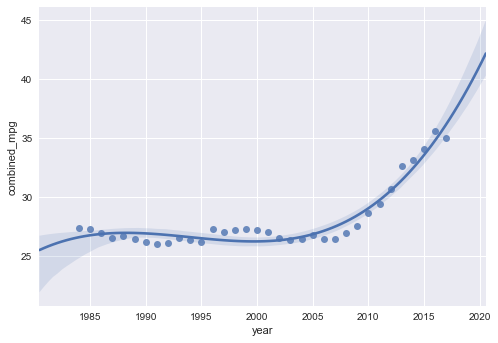

In [226]:
# Model fits well with an order of 3, may suggest polynomial regression.
# Around 2007 is when average fuel economy started to see a massive increase.

sns.regplot(x="year", 
           y="combined_mpg", 
           data=avg_make_year, order=3);

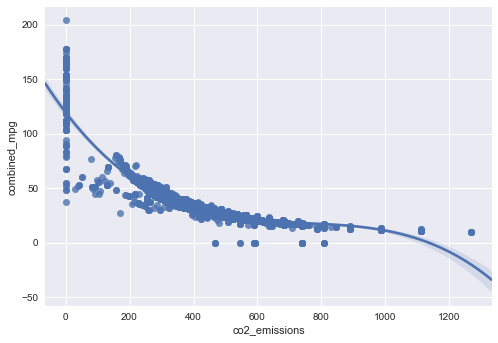

In [227]:
# Illustrates how bad fuel economy has a direct impact on emissions.

sns.regplot(x=fuel["co2_emissions"],
           y=fuel["combined_mpg"],
           order=3);

In [235]:
X="co2_emissions"
y="combined_mpg"
# Linear Fit
X = fuel[X]
X = np.vander(X, 3) # Power of 3
y = fuel[y]

model = sm.OLS(y, X) 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           combined_mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.224e+05
Date:                Thu, 09 Mar 2017   Prob (F-statistic):               0.00
Time:                        08:51:41   Log-Likelihood:            -1.0277e+05
No. Observations:               38120   AIC:                         2.055e+05
Df Residuals:                   38117   BIC:                         2.056e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0001   6.47e-07    231.128      0.000         0.000     0.000
x2            -0.2179      0.001   -322.729      0.000        -0.219    -0.217
const         95.4825      0.173    551.684      0.000        95.143    95.822
==============================================================================
Omnibus:                    55449.566   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         67309415.275
Skew:                           8.321   Prob(JB):                         0.00
Kurtosis:                     208.184   Cond. No.                     2.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

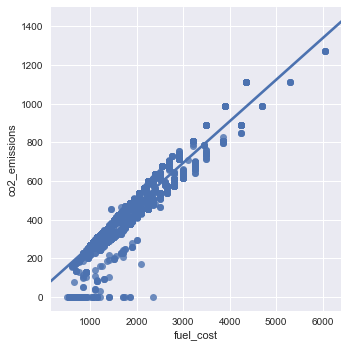

In [236]:
# The more you spend on fuel, the greater your impact on the environment. 

sns.lmplot(y="co2_emissions", 
           x="fuel_cost", 
           data=fuel);

In [237]:
# verifying no outliers
#zero_look = fuel[fuel.co2_emissions == 0].sort_values(by='year')

#zero_look

In [238]:
#Datasets. (With features restricted specific only to probability use.)

auto_great = pd.crosstab(fuel.combined_mpg[fuel.combined_mpg >= 30],\
                         [fuel.transmission[fuel.transmission == 'automatic']],\
                         rownames=['greater than 30mpg'], colnames=['automatic'])

auto_less = pd.crosstab(fuel.combined_mpg[fuel.combined_mpg < 30],\
                         [fuel.transmission[fuel.transmission == 'automatic']],\
                         rownames=['less than 30mpg'], colnames=['automatic'])

manual_great = pd.crosstab(fuel.combined_mpg[fuel.combined_mpg >= 30],\
                         [fuel.transmission[fuel.transmission == 'manual']],\
                         rownames=['greater than 30mpg'], colnames=['manual'])

manual_less = pd.crosstab(fuel.combined_mpg[fuel.combined_mpg < 30],\
                         [fuel.transmission[fuel.transmission == 'manual']],\
                         rownames=['less than 30mpg'], colnames=['manual'])

############################################################################################################

#The good stuff.
#Change the format above this, to the format below... indices finaly properly labeled.

over30_automatic_gasoline = fuel[((fuel.combined_mpg >= 30) & (fuel.transmission == 'automatic')) &\
         ((fuel.fueltype1 == 'regular_gasoline') | (fuel.fueltype1 == 'premium_gasoline')\
         | (fuel.fueltype1 == 'midgrade_gasoline'))].combined_mpg

all_automatic_gasoline = fuel[((fuel.transmission == 'automatic')) &\
         ((fuel.fueltype1 == 'regular_gasoline') | (fuel.fueltype1 == 'premium_gasoline')\
         | (fuel.fueltype1 == 'midgrade_gasoline'))].combined_mpg

over30_automatic_gasoline = fuel[((fuel.combined_mpg >= 30) & (fuel.transmission == 'automatic')) &\
         ((fuel.fueltype1 == 'regular_gasoline') | (fuel.fueltype1 == 'premium_gasoline')\
         | (fuel.fueltype1 == 'midgrade_gasoline'))].combined_mpg

all_auto = fuel[fuel.transmission == 'automatic'].combined_mpg #This is all the automatic cars in the dataset.

all_manual = fuel[fuel.transmission == 'manual'].combined_mpg

all_gas = fuel[(fuel.make.str.contains('mercedes'))].combined_mpg #All cars that use gasoline as fuel.



############################################################################################################

#Data derived using previous wrong format.
auto_over_30 = sum(auto_great['automatic'])
auto_less_30 = sum(auto_less['automatic'])
manual_over_30 = sum(manual_great['manual'])
manual_less_30 = sum(manual_less['manual'])

#Data derived using new format.
auto_over30_gas = len(over30_automatic_gasoline)/len(all_auto)

############################################################################################################


print(auto_over_30,',','this is how many automatic vehicles achieve over 30mpg.')
print(auto_less_30,',','this is how many automatic vehicles achieve less than 30mpg.')
print(manual_over_30,',','this is how many manual vehicles achieve over 30mpg.')
print(manual_less_30,',','this is how many manual vehicles achieve less than 30mpg.')


7078 , this is how many automatic vehicles achieve over 30mpg.
18606 , this is how many automatic vehicles achieve less than 30mpg.
5494 , this is how many manual vehicles achieve over 30mpg.
6931 , this is how many manual vehicles achieve less than 30mpg.


In [239]:
#Actual probability count. 

#Probability of vehicles with different transmissions, getting 30 mpg fuel efficiency:
prob_over30_auto = auto_over_30/(auto_over_30+auto_less_30)
prob_less30_auto = auto_less_30/(auto_over_30+auto_less_30)
prob_over30_manual = manual_over_30/(manual_over_30+manual_less_30)
prob_less30_manual = manual_less_30/(manual_over_30+manual_less_30)

#Using better format: 



print (prob_over30_auto,',','Probability for an automatic vehicle getting at least 30mpg')
print (prob_less30_auto,',','Probability for an automatic vehicle getting less than 30mpg')
print (prob_over30_manual,',','Probability for a manual vehicle getting at least 30mpg')
print (prob_less30_manual,',','Probability for a manual vehicle getting less than 30mpg')



0.275580127706 , Probability for an automatic vehicle getting at least 30mpg
0.724419872294 , Probability for an automatic vehicle getting less than 30mpg
0.442173038229 , Probability for a manual vehicle getting at least 30mpg
0.557826961771 , Probability for a manual vehicle getting less than 30mpg


Binomial Distribution
----- 
 
Let P = The probability of a car having the efficiency of at least 30mpg in the last 30 years.

Let X = The amount of times a car having the efficiency of at least 30mpg in the last 30 years at random, is selected.

Let n = The amount of times to run this simulation.

$$X \sim Bin(n = 100, p = 0.5)$$


In [240]:
#n, p = 100, prob_over30_auto  # number of trials, probability of each trial
#ber_over_a = np.random.binomial(n, p, 1000)

#n, p = 100, prob_less30_auto
#ber_less_a = np.random.binomial(n, p, 1000)

#n, p = 100, prob_over30_manual
#ber_over_m = np.random.binomial(n, p, 1000)

#n, p = 100, prob_less30_manual
#ber_less_m = np.random.binomial(n, p, 1000)

In [241]:
#Binomial distribution for the probability of an automatic vehicle having over 30mpg. 
#With random dataset.

#plt.hist(ber_over_a,
     #bins=8);

#after the 25th~~ simulation, there were 250 successes. 

0.275580127706


25684

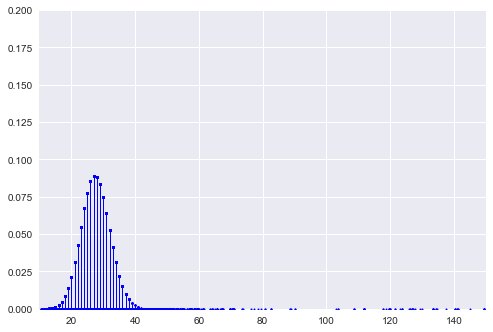

In [242]:
# Display the probability mass function of X, Over 30mpg, auto.
x = all_auto
n, p = 100, prob_over30_auto
plt.plot(x, binom.pmf(x, n, p), 'bo', ms =2, lw=0.1)
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=1, alpha=0.5)
plt.ylim(0, 0.2)
plt.xlim(10, 150);
print(p)
len(x)

#Such a wide range of values, probabilities become very small.

0.275580127706


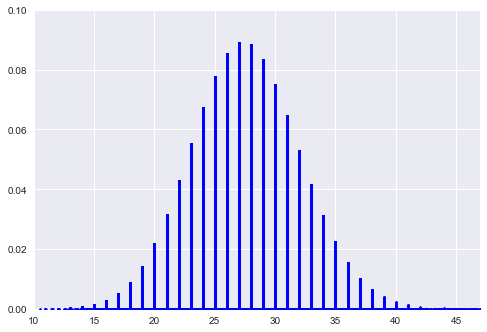

In [243]:
# Magnify..

x = all_auto
n, p = 100, prob_over30_auto
plt.plot(x, binom.pmf(x, n, p), 'bo', ms =2, lw=0.1)
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)
plt.ylim(0, .1)
plt.xlim(10, 47);
print(p)

# Easy to see where the bias is for probability, most likely signifying a mean around this highest probability. 

0.2593832736333904


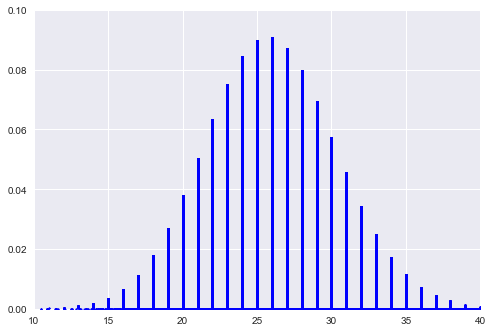

In [244]:
# Displayed is the distribution of the probability mass function  
# for an automatic and gasoline fueled vehicle that averages at least 
# 30mpg.

# So now that we created a more restrictive dataset, 
# the probability for a gasoline and automatic vehicle to 
# achieve at least 30mpg is slightly less.

x = all_automatic_gasoline

n, p = 100, auto_over30_gas
plt.plot(x, binom.pmf(x, n, p), 'bo', ms =2, lw=0.1)
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=3, alpha=0.5)
plt.ylim(0, 0.1)
plt.xlim(10, 40);
print(p)


# Probability of higher success rate is lower than above..
# So, less success, and less chance at success.. since there are more
# restrictions.

Hypothesis Testing  
------

In [245]:
# The hypothesis is...
        # Over the last 10 years, has the mean of America's automaker's fuel emissions output
        # in their automobiles, decreased more than the means of her foreign competitors?

# u1 = America's mean for fuel emissions in the last 10 years.         
# u2 = Competitor's mean for fuel emissions in the last 10 years.        

# Null Hypothesis: u1 - u2 >= 0
# Alternative Hypothesis: u1 - u2 < 0

In [246]:
#1. Must first seperate data.
        #We need......Make, Years, Fuel Type, and CO2 Emission.
#2. Filter data, so that only top automakers for america and the other foreign countries are selected.
#3. Analyze.
#4. Model.

In [247]:
america = fuel[((fuel.fueltype1.str.contains('gasoline')) & (fuel.year > 2006) & (fuel.year < 2018)) &\
         ((fuel.make == 'ford') | (fuel.make == 'dodge') | (fuel.make == 'chevrolet'))].co2_emissions

germany = fuel[((fuel.fueltype1.str.contains("gasoline")) & (fuel.year > 2006) & (fuel.year < 2018)) &\
         ((fuel.make == 'bmw') | (fuel.make.str.contains('mercedes')) | (fuel.make == 'volkswagen'))].co2_emissions

japan = fuel[((fuel.fueltype1.str.contains("gasoline")) & (fuel.year > 2006) & (fuel.year < 2018)) &\
         ((fuel.make == 'toyota') | (fuel.make == 'honda') | (fuel.make == 'nissan'))].co2_emissions

south_korea = fuel[((fuel.fueltype1.str.contains("gasoline")) & (fuel.year > 2006) & (fuel.year < 2018)) &\
         ((fuel.make == 'kia') | (fuel.make == "hyundai"))].co2_emissions

In [248]:
sample1 = america
sample2 = germany
sample3 = japan
sample4 = south_korea

#America vs Germany
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
germ_t = t_stat
germ_p = p_val
degree_free_1 = len(sample1) + len(sample2) - 2

#America vs Japan
t_stat, p_val = stats.ttest_ind(sample1, sample3, equal_var=False)
japan_t = t_stat
japan_p = p_val
degree_free_2 = len(sample1) + len(sample3) - 2

#America vs South Korea
t_stat, p_val = stats.ttest_ind(sample1, sample4, equal_var=False)
kor_t = t_stat
kor_p = p_val
degree_free_3 = len(sample1) + len(sample4) - 2

# the two tailed p_value is returned.

print(germ_p,',','is the p-value for America vs Germany')
print(japan_p,',','is the p-value for America vs Japan')
print(kor_p,',','is the p_value for America vs South Korea')
print('')
print('The p-value is less than the significance level of 0.05')
print ('')
print('Therefore, the Null-Hypothesis is rejected for every scenario.')
print('Go USA.')

2.48794197716e-06 , is the p-value for America vs Germany
3.26534085183e-37 , is the p-value for America vs Japan
1.75610893132e-115 , is the p_value for America vs South Korea

The p-value is less than the significance level of 0.05

Therefore, the Null-Hypothesis is rejected for every scenario.
Go USA.
